# Analysis of Quality Negative Samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

ns_qual_analysis_dir = "NS_quality_analysis"

### Get a list with all available files with outsaved SNS/NSN minus distances

In [2]:
ns_qual_analysis_files = glob(ns_qual_analysis_dir + "/*/*/*.npz", recursive=True)
ns_qual_analysis_files

['NS_quality_analysis\\FB15k\\ESNSRidle_absolute_similarity\\triple_279362_after_epoch_1.npz',
 'NS_quality_analysis\\Nations\\ESNSRelaxed_absolute_similarity\\triple_47_after_epoch_100.npz',
 'NS_quality_analysis\\Nations\\ESNSRelaxed_absolute_similarity\\triple_47_after_epoch_20.npz',
 'NS_quality_analysis\\Nations\\ESNSRelaxed_absolute_similarity\\triple_47_after_epoch_40.npz',
 'NS_quality_analysis\\Nations\\ESNSRelaxed_absolute_similarity\\triple_47_after_epoch_60.npz',
 'NS_quality_analysis\\Nations\\ESNSRelaxed_absolute_similarity\\triple_47_after_epoch_80.npz',
 'NS_quality_analysis\\Nations\\ESNSRidle_absolute_similarity\\triple_1180_after_epoch_3.npz']

### Decide what to plot

In [3]:
files_to_plot = [0]
curve_descriptions = ["triple 279362"]
plot_title = "Distribution of negative samples"

### CCDF plot

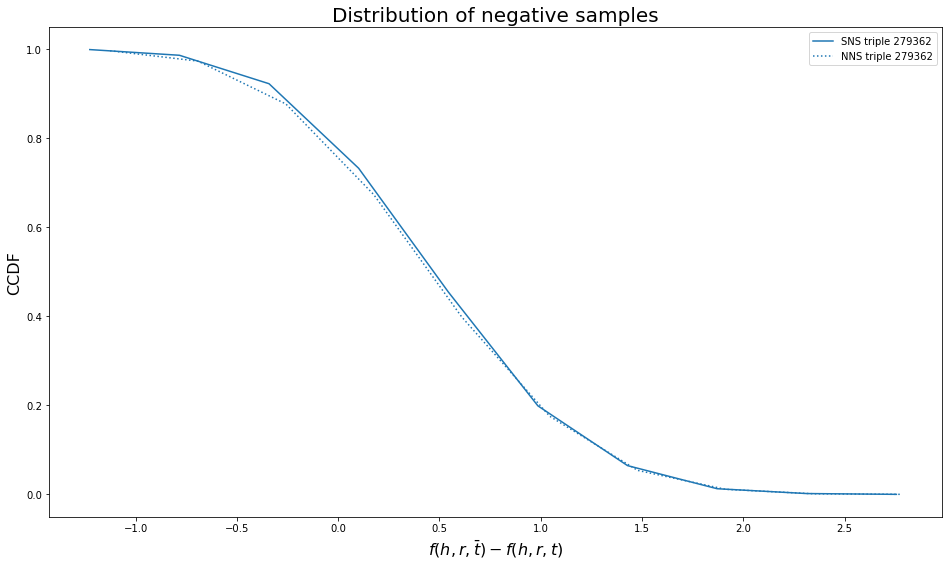

In [4]:
plt.figure(figsize=(16,9))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_index = 0
for f in range(len(ns_qual_analysis_files)):
    if f in files_to_plot:
        minus_distances = dict(np.load(ns_qual_analysis_files[f]))
        count_sns, bins_count_sns = np.histogram(minus_distances['sns'], bins=10)
        count_nns, bins_count_nns = np.histogram(minus_distances['nns'], bins=10)

        pdf_sns = count_sns / sum(count_sns)
        pdf_nns = count_nns / sum(count_nns)

        cdf_sns = np.cumsum(pdf_sns)
        cdf_nns = np.cumsum(pdf_nns)

        plt.plot(bins_count_sns[1:], 1-cdf_sns, label="SNS {}".format(curve_descriptions[color_index]), color=colors[color_index])
        plt.plot(bins_count_nns[1:], 1-cdf_nns, label="NNS {}".format(curve_descriptions[color_index]), color=colors[color_index], linestyle="dotted")

        plt.legend()
        plt.title(plot_title, fontsize=20)
        plt.xlabel(r"$f(h, r, \bar{t}) - f(h, r, t)$", fontsize=16)
        plt.ylabel("CCDF", fontsize=16)

        color_index += 1